# dmf 1

In [7]:
df[['energy']].idxmin()

energy    0.474
dtype: float64

S         -0.5739        -0.0137   -0.2990
Na        7.0061       -11.7330   -0.4519
O         -2.2801        -4.2757   -0.8997
O         -0.5714        -3.0064    1.7018
O         -4.1715        -3.6678    0.1784
O         1.0737        -2.7687    0.1707
O         -1.7322         0.6992   -0.9737
O         -0.6005         0.3699    1.1671
O         0.7215         0.1278   -0.9677
C         -2.9349        -3.4420   -0.3127
C         -2.5098        -2.0088   -0.0552
C         -1.0279        -1.8077   -0.3516
C         -0.1697        -2.5919    0.6355
C         1.9694        -3.4653    1.0526
C         -4.6792        -4.9974   -0.0265
H         -2.7270        -1.7610    0.9874
H         -3.1069        -1.3491   -0.6932
H         -0.7810        -2.1197   -1.3688
H         2.9223        -3.5045    0.5251
H         1.5968        -4.4729    1.2553
H         2.0724        -2.9229    1.9959
H         -4.7408        -5.2257   -1.0939
H         -5.6715        -5.0040    0.4255
H         -4.0309 

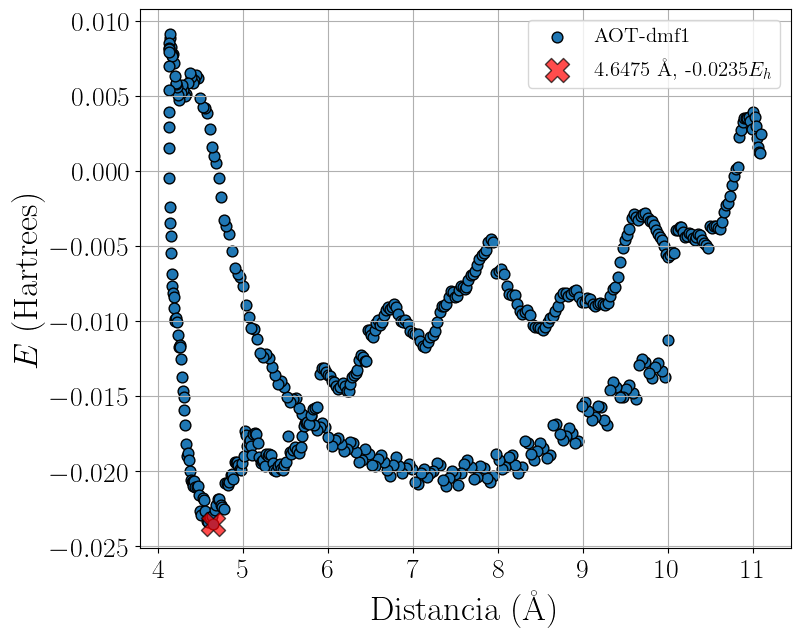

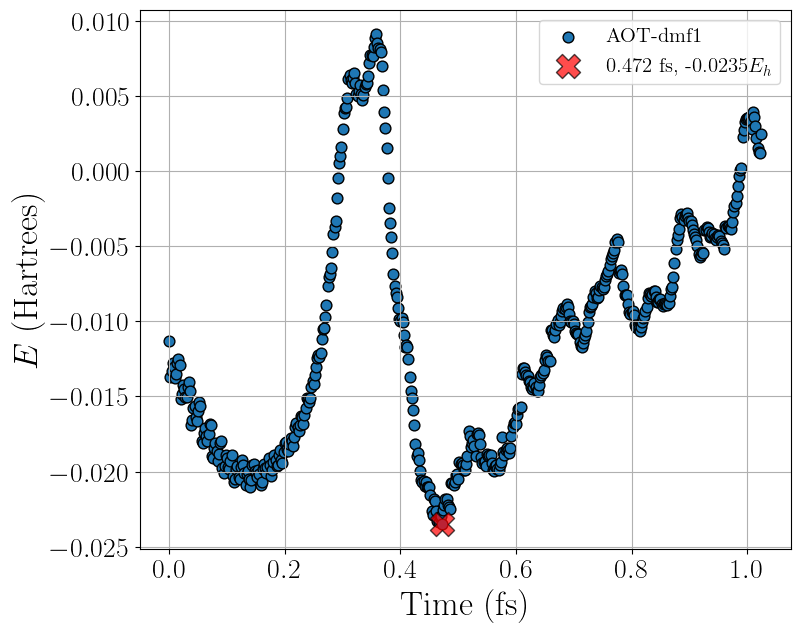

In [12]:
import numpy as np
import sys
sys.path.append('../code/')
from herramientas import *
import matplotlib.pyplot as plt
# from matplotlib import rc



herr = herramientas()

plabel = "gl"
aot_alone = -1321.244893630513 
sol_alone = -230.330038311198   #<=========
sol_alone = -344.899959353878
sol_alone = -248.589025296097
# -248.589025296097

path_grl0 = "/data/mllab/SIMS/aot_solventes/aot-dmf-1"

plabel = "dmf1"


path_grl0 = "/data/mllab/SIMS/aot_solventes/aot-dmf-1" #<======
path_salida = os.path.join(path_grl0, "salida.out")
path = path_salida
txt_2find = "Total DFT energy"

N = 36  #<=================================
au2aFactor = 0.5291771057875306

dic2 = {}
dic2["energy"] = {}
dic2["distance"] = {}

dfxyz = 0
idy = 0 # frames
f = open(path, 'r')
for line in f:
    
    if "DFT ENERGY GRADIENTS" in line:
        line = next(f)
        line = next(f)
        line = next(f)
        
        dic = {}
        dic["ida"] = {}
        dic["atom"] = {}
        dic["x"] = {}
        dic["y"] = {}
        dic["z"] = {}
            
        idx=0
        for i in range(N):
            line = next(f)
            sp = line.split()
            
            ida = sp[0]
            atom = sp[1]
            x = sp[2]
            y = sp[3]
            z = sp[4]
            
            dic["ida"][idx] = ida
            dic["atom"][idx] = atom
            dic["x"][idx] = float(x)*au2aFactor
            dic["y"][idx] = float(y)*au2aFactor
            dic["z"][idx] = float(z)*au2aFactor
            idx+=1
            
        dfxyz = pd.DataFrame(dic)

        # calculando distancia entre cabeza y CM de compuesto disparado
#         cm_vMol = herr.get_CM_from_frame(df=dfxyz.loc[66:]).values
        cm_vMol = herr.get_CM_from_frame(df=dfxyz.loc[24:]).values # hasta donde abarca el aot-na-cabeza
        vS = dfxyz[["x", "y", "z"]].loc[0].values  # cambia, es 1 para la cabeza
        d = np.linalg.norm(cm_vMol - vS)
        dic2["distance"][idy] = float(d)

            
        
    if txt_2find in line:
        energy = line.split()[4]
        dic2["energy"][idy] = float(energy)
        idy+=1        


f.close() # lectura

df = pd.DataFrame(dic2)
# df = df.drop([0, 1, 601])
df = df.dropna()
df = df.reset_index()
# df2 = df.sort_values(by="distance")
# df2 = df.iloc[:-100].copy()
# df2 = df.copy()

# refP = df2["energy"].iloc[-1]


refP = aot_alone + sol_alone
df["energy"] = df["energy"] - refP

# df2 = df2.iloc[:450]

d = df["distance"].values
e = df["energy"].values 



# plt.scatter(d, e, s=40, edgecolors='black')
# plt.show()


# #############################33

# frames = df.index.values
# plt.scatter(frames, e, s=50, edgecolors='black')
# plt.xlabel("frames", fontsize=14)
# plt.ylabel("energia", fontsize=14)
# plt.show()


#############################
# distancia H a 


#############################

path_movie = os.path.join(path_grl0, f"aot-{plabel}-2.pkl") # <===============
df_mpkl = pd.read_pickle("aot-dmf-1.pkl")

tmp_df = df_mpkl[df_mpkl["frame"] == df.loc[df[['energy']].idxmin()].index[0]].copy()
tmp_df.loc[:,'ida'] = tmp_df['ida'].astype(int)
tmp_df = tmp_df.set_index('ida')

# for idx in tmp_df.loc[24:].index:
for idx in tmp_df.index:
    
    symbol = tmp_df["atom"].loc[idx]
    x, y, z = tmp_df[["x", "y", "z"]].loc[idx].values
    print(f"{symbol:<10}{x:.4f}{y:15.4f}{z:10.4f}")
    


print(df.loc[df[['energy']].idxmin()])
#



##################################

d = df["distance"].values
e = df["energy"].values 


fig = plt.figure()
ax = plt.gca()


markers = ["v", "P", "X", "^"]
tcolors = ["#6495ED", "#32CD32", "#FFA500", "#D2691E"]


# plt.plot(distances, ener, '-o', label="B3LYP/6-311++G**")
# plt.scatter(d, e, s=40, edgecolors='black', label="B3LYP/6-311++G**")
plt.scatter(d, e, s=60, edgecolors='black', label=f"AOT-{plabel}")

xmin = df.loc[df[['energy']].idxmin()]["distance"].iloc[0]
ymin = df.loc[df[['energy']].idxmin()]["energy"].iloc[0]

xmin_label = str(np.round(xmin, decimals=4))
ymin_label = str(np.round(ymin, decimals=4))
plt.scatter(xmin, ymin, label=f"{xmin_label} \AA, " + f"{ymin_label}" + r"$ E_{h}$",
            alpha=0.7, c="#ff0000", marker="X", s=300, edgecolors='k')



print(df.loc[df[['energy']].idxmin()])




ymin = e.min()
ymax = e.max()
print(ymin)

# plt.ylim([ymin , ymax])
plt.xlabel("Distancia (\AA)", fontsize=25)
plt.ylabel(r"$ E$ (Hartrees)", fontsize=25)
plt.grid()

fw = 6
fh = 5
ff = fw/fh

fh = 7
fw = fh*ff

fig.set_size_inches(fw, fh)

plt.legend(fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

name_plot = f"aot-{plabel}-bg-distance.pdf"
fig.savefig(name_plot, format="pdf", dpi=400, bbox_inches='tight')

#############
fig = plt.figure()
ax = plt.gca()


markers = ["v", "P", "X", "^"]


# plt.plot(frames, ener, '-o', label="B3LYP/6-31G**")

df = df.set_index(2*df.index.values/1e3)

frames = df.index.values

# plt.scatter(frames, e, s=50, edgecolors='black', label="B3LYP/6-31G**")
plt.scatter(frames, e, s=60, edgecolors='black', label=f"AOT-{plabel}")
# plt.plot(x[idx_max], yp[idx_max], "rx")

# xlocs, labels = plt.xticks()
# xlabels = ("RM$_{15}$", "RM$_{23}$", "RM$_{39}$", "RM$_{62}$")
# plt.xticks(xlocs, xlabels)





xmin = df.loc[df[['energy']].idxmin()].iloc[0].name
ymin = df.loc[df[['energy']].idxmin()]["energy"].iloc[0]

xmin_label = str(np.round(xmin, decimals=4))
ymin_label = str(np.round(ymin, decimals=4))
plt.scatter(xmin, ymin, label=f"{xmin_label} fs, " + f"{ymin_label}" + "$ E_{h}$",
            alpha=0.7, c="#ff0000", marker="X", s=300, edgecolors='k')



# plt.scatter(frames, e, s=50, label="B3LYP/6-31G**")


plt.xlabel("Time (fs)", fontsize=25)
plt.ylabel(r"$ E$  (Hartrees)", fontsize=25)
plt.grid()

fw = 6
fh = 5
ff = fw/fh

fh = 7
fw = fh*ff

fig.set_size_inches(fw, fh)

plt.legend(fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

name_plot = f"aot-{plabel}-bg-time.pdf"
fig.savefig(name_plot, format="pdf", dpi=400, bbox_inches='tight')



In [13]:
# title "dinamica aot w dmf"

# start dinamicahor

# echo

# # -------------------------------
# # hardware parameters and working directories
# # -------------------------------

# #memory total 4000 stack 1000 heap 1000 global 2000 mb

# permanent_dir /home/antonio/aot-dmf-2/permanent
# scratch_dir   /home/antonio/aot-dmf-2/scratch

# # -------------------------------
# # charge, geometry & restrictions
# # -------------------------------

# charge 0

# geometry units angstroms noautoz
 
# S         -0.5739        -0.0137   -0.2990
# Na        7.0061       -11.7330   -0.4519
# O         -2.2801        -4.2757   -0.8997
# O         -0.5714        -3.0064    1.7018
# O         -4.1715        -3.6678    0.1784
# O         1.0737        -2.7687    0.1707
# O         -1.7322         0.6992   -0.9737
# O         -0.6005         0.3699    1.1671
# O         0.7215         0.1278   -0.9677
# C         -2.9349        -3.4420   -0.3127
# C         -2.5098        -2.0088   -0.0552
# C         -1.0279        -1.8077   -0.3516
# C         -0.1697        -2.5919    0.6355
# C         1.9694        -3.4653    1.0526
# C         -4.6792        -4.9974   -0.0265
# H         -2.7270        -1.7610    0.9874
# H         -3.1069        -1.3491   -0.6932
# H         -0.7810        -2.1197   -1.3688
# H         2.9223        -3.5045    0.5251
# H         1.5968        -4.4729    1.2553
# H         2.0724        -2.9229    1.9959
# H         -4.7408        -5.2257   -1.0939
# H         -5.6715        -5.0040    0.4255
# H         -4.0309        -5.7322    0.4578
# O         -1.5301         5.1182    1.3889
# N         0.4980         4.7087    0.3638
# C         -0.8157         5.0959    0.4291
# C         0.9986         4.3542   -0.9592
# C         1.1540         4.1030    1.5282
# H         -1.1688         5.4235   -0.5613
# H         2.0723         4.5447   -1.0114
# H         0.7937         3.3027   -1.1809
# H         0.4763         4.9621   -1.7008
# H         1.1572         3.0087    1.4437
# end


# # -------------------------------
# # molecular orbital basis sets
# # -------------------------------

# basis spherical
# * library "6-311++G**"
# end

# # -------------------------------
# #  level of theory
# # -------------------------------	

# dft
#  xc b3lyp

# 2da-dins aot-dmf-2-002

refP e[-1]-1569.831439569446
refP A + B: -1569.8339189266098
S         -0.5739217     -0.0137168     -0.2990417
Na        7.0060578    -11.7329799     -0.4519178
O         -2.2801183     -4.2757230     -0.8997387
O         -0.5713959     -3.0064292      1.7018066
O         -4.1714576     -3.6678302      0.1783872
O         1.0736501     -2.7686684      0.1707035
O         -1.7321946      0.6991869     -0.9736679
O         -0.6004768      0.3698525      1.1670826
O         0.7215314      0.1277672     -0.9676829
C         -2.9349252     -3.4419515     -0.3126966
C         -2.5098235     -2.0088092     -0.0552228
C         -1.0278964     -1.8077463     -0.3516435
C         -0.1697214     -2.5918819      0.6354914
C         1.9693839     -3.4653168      1.0525878
C         -4.6791771     -4.9973501     -0.0264546
H         -2.7269629     -1.7610448      0.9874471
H         -3.1069268     -1.3491095     -0.6931543
H         -0.7809548     -2.1197110     -1.3687584
H         2.9222726     -

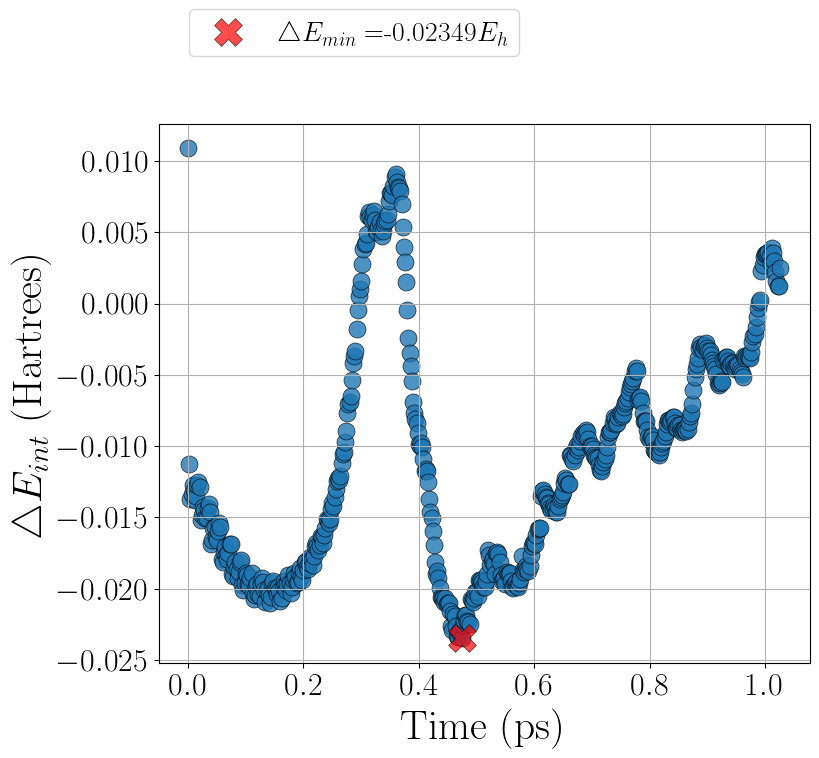

aot-dmf1-bg.pdf


In [10]:
import numpy as np
import sys
sys.path.append('../code/')
from herramientas import *
import matplotlib.pyplot as plt
from collections import defaultdict
import codecs
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) 
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"


herr = herramientas()

# path_grl0 = "/home/antonio/SIMS/aot-dmf-2"
# aot-dmf-1
path_grl0 = "/data/mllab/SIMS/aot_solventes/aot-dmf-1"

plabel = "dmf1"

path_salida = os.path.join(path_grl0, "salida.out")
path = path_salida
txt_2find = "Total DFT energy"

N = 36
au2aFactor = 0.5291771057875306

dic2 = defaultdict(dict)

dfxyz_ = pd.DataFrame({})
idy = 0 # frames
f = open(path, 'r')
# f = open(path, 'r', encoding='utf-8')
# fdata = codecs.open(path, 'r', encoding='utf-8', errors='ignore') 

for line in f:
    
    if txt_2find in line:
        energy = line.split()[4]
        dic2["energy"][idy] = float(energy)
    
    if "DFT ENERGY GRADIENTS" in line:
        line = next(f)
        line = next(f)
        line = next(f)
        
        dic = defaultdict(dict)
        
        idx=0
        for i in range(N):
            line = next(f)
            sp = line.split()
            
            ida = sp[0]
            atom = sp[1]
            x = sp[2]
            y = sp[3]
            z = sp[4]
            fx = sp[5]
            fy = sp[6]
            fz = sp[7]
            
            dic["ida"][idx] = ida
            dic["atom"][idx] = atom
            dic["x"][idx] = float(x)*au2aFactor
            dic["y"][idx] = float(y)*au2aFactor
            dic["z"][idx] = float(z)*au2aFactor
            dic["fx"][idx] = float(fx)
            dic["fy"][idx] = float(fy)
            dic["fz"][idx] = float(fz)        
            dic["frame"][idx] = idy  
            
            idx+=1
            
        dfxyz = pd.DataFrame(dic)
        dfxyz_ = pd.concat([dfxyz_, dfxyz], ignore_index=True)        
 
        cm_vMol = herr.get_CM_from_frame(df=dfxyz.loc[24:]).values 
        vS = dfxyz[["x", "y", "z"]].loc[0].values 
        d = np.linalg.norm(cm_vMol - vS)        
        
        dic2["distance"][idy] = float(d)
        
        
        idy+=1
        
        
        
f.close() 

fig = plt.figure()
ax = plt.gca()

df = pd.DataFrame(dic2)

df2 = df.copy()

refP = df2["energy"].iloc[-1]
print(f"refP e[-1]{refP}")


# -248.589025296097
refP = (-1321.244893630513) + (-248.589025296097) # forma E alone no def
refP = (-1321.244893630513) + (-248.589025296097) # forma E alone no def



print(f"refP A + B: {refP}")

# df2 = df2.loc[5:]
# df2 = df2[(df2["energy"] - refP)  < -0.02 ]

d = df2["distance"].values
e = df2["energy"].values - refP

df_mpkl = dfxyz_.copy()  # <=======


tmp_df = df_mpkl[df_mpkl["frame"] == df.loc[df[['energy']].idxmin()].index[0]].copy()
tmp_df.loc[:,'ida'] = tmp_df['ida'].astype(int)
tmp_df = tmp_df.set_index('ida')

for idx in tmp_df.index:
    
    symbol = tmp_df["atom"].loc[idx]
    x, y, z = tmp_df[["x", "y", "z"]].loc[idx].values
    print(f"{symbol:<10}{x:.7f}{y:15.7f}{z:15.7f}")
    

df.loc[df[['energy']].idxmin()]





markers = ["v", "P", "X", "^"]


df = df.set_index(2*df.index.values/1e3)
df2 = df2.set_index(2*df2.index.values/1e3)

frames = df.index.values

# from
# c = max + (min-max)/2
# so
# c = min +max/2

# c = (df2["energy"].min() + df2["energy"].max())/2.0
# df3 = df2[df2["energy"] < c].copy()

df3 = df2.copy()

frames = df3.index.values
e = df3["energy"].values - refP

# plt.scatter(frames, e, s=150, edgecolors='black', label=f"AOT-MeOH", alpha=0.8, linewidth=0.5)
plt.scatter(frames, e, s=150, edgecolors='black', alpha=0.8, linewidth=0.5)


#################################################


xmin = df.loc[df[['energy']].idxmin()].iloc[0].name
ymin = df.loc[df[['energy']].idxmin()]["energy"].iloc[0]
print(f"ymin {ymin}")
ymin =  ymin - refP
print(f"ymin - refP: {ymin}")

xmin_label = np.round(xmin, decimals=4)
ymin_label = np.round(ymin, decimals=5)

txt1 = r"$t_{min}=$"
txt2 = r"$\triangle E_{min}=$"
# plt.scatter(xmin, ymin, label=f"{txt1}" + f"{xmin_label:.2f} fs, " + f"{txt2}" + f"{ymin_label:.4f}" + "$ E_{h}$",
#             alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)

plt.scatter(xmin, ymin, label=f"{txt2}" + f"{ymin_label:.5f}" + "$ E_{h}$",
            alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)




# plt.scatter(frames, e, s=50, label="B3LYP/6-31G**")


plt.xlabel("Time (ps)", fontsize=30)
plt.ylabel(r"$\triangle E_{int}$  (Hartrees)", fontsize=30)
plt.grid()

fw = 6
fh = 5
ff = fw/fh

fh = 7
fw = fh*ff

fig.set_size_inches(fw, fh)

plt.legend(fontsize=20)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)


ax.legend(loc='lower center', fontsize=20,  bbox_to_anchor=(0.3,1.1))

plt.show()

name_plot = f"aot-{plabel}-bg-time.pdf"
name_plot = f"aot-{plabel}-bg.pdf"
fig.savefig(name_plot, format="pdf", bbox_inches='tight')
print(name_plot)



In [9]:
import numpy as np
import sys
sys.path.append('../code/')
from herramientas import *
import matplotlib.pyplot as plt
from collections import defaultdict
import codecs
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) 
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"


herr = herramientas()

# path_grl0 = "/home/antonio/SIMS/aot-dmf-2"
path_grl0 = "/data/mllab/SIMS/aot_solventes/aot-dmf-2"

plabel = "dmf2"

path_salida = os.path.join(path_grl0, "salida.out")
path = path_salida
txt_2find = "Total DFT energy"

N = 34
au2aFactor = 0.5291771057875306

dic2 = defaultdict(dict)

dfxyz_ = pd.DataFrame({})
idy = 0 # frames
f = open(path, 'r')
# f = open(path, 'r', encoding='utf-8')
# fdata = codecs.open(path, 'r', encoding='utf-8', errors='ignore') 

for line in f:
    
    if txt_2find in line:
        energy = line.split()[4]
        dic2["energy"][idy] = float(energy)
    
    if "DFT ENERGY GRADIENTS" in line:
        line = next(f)
        line = next(f)
        line = next(f)
        
        dic = defaultdict(dict)
        
        idx=0
        for i in range(N):
            line = next(f)
            sp = line.split()
            
            ida = sp[0]
            atom = sp[1]
            x = sp[2]
            y = sp[3]
            z = sp[4]
            fx = sp[5]
            fy = sp[6]
            fz = sp[7]
            
            dic["ida"][idx] = ida
            dic["atom"][idx] = atom
            dic["x"][idx] = float(x)*au2aFactor
            dic["y"][idx] = float(y)*au2aFactor
            dic["z"][idx] = float(z)*au2aFactor
            dic["fx"][idx] = float(fx)
            dic["fy"][idx] = float(fy)
            dic["fz"][idx] = float(fz)        
            dic["frame"][idx] = idy  
            
            idx+=1
            
        dfxyz = pd.DataFrame(dic)
        dfxyz_ = pd.concat([dfxyz_, dfxyz], ignore_index=True)        
 
        cm_vMol = herr.get_CM_from_frame(df=dfxyz.loc[24:]).values 
        vS = dfxyz[["x", "y", "z"]].loc[0].values 
        d = np.linalg.norm(cm_vMol - vS)        
        
        dic2["distance"][idy] = float(d)
        
        
        idy+=1
        
        
        
f.close() 

fig = plt.figure()
ax = plt.gca()

df = pd.DataFrame(dic2)

df2 = df.copy()

refP = df2["energy"].iloc[-1]
print(f"refP e[-1]{refP}")


# -248.589025296097
refP = (-1321.244893630513) + (-248.589025296097) # forma E alone no def
print(f"refP A + B: {refP}")

# df2 = df2.loc[5:]
# df2 = df2[(df2["energy"] - refP)  < -0.02 ]

d = df2["distance"].values
e = df2["energy"].values - refP

df_mpkl = dfxyz_.copy()  # <=======


tmp_df = df_mpkl[df_mpkl["frame"] == df.loc[df[['energy']].idxmin()].index[0]].copy()
tmp_df.loc[:,'ida'] = tmp_df['ida'].astype(int)
tmp_df = tmp_df.set_index('ida')

for idx in tmp_df.index:
    
    symbol = tmp_df["atom"].loc[idx]
    x, y, z = tmp_df[["x", "y", "z"]].loc[idx].values
    print(f"{symbol:<10}{x:.7f}{y:15.7f}{z:15.7f}")
    

df.loc[df[['energy']].idxmin()]





markers = ["v", "P", "X", "^"]


df = df.set_index(2*df.index.values/1e3)
df2 = df2.set_index(2*df2.index.values/1e3)

frames = df.index.values

# from
# c = max + (min-max)/2
# so
# c = min +max/2

# c = (df2["energy"].min() + df2["energy"].max())/2.0
# df3 = df2[df2["energy"] < c].copy()

df3 = df2.copy()

frames = df3.index.values
e = df3["energy"].values - refP

# plt.scatter(frames, e, s=150, edgecolors='black', label=f"AOT-MeOH", alpha=0.8, linewidth=0.5)
plt.scatter(frames, e, s=150, edgecolors='black', alpha=0.8, linewidth=0.5)


#################################################


xmin = df.loc[df[['energy']].idxmin()].iloc[0].name
ymin = df.loc[df[['energy']].idxmin()]["energy"].iloc[0]
print(f"ymin {ymin}")
ymin =  ymin - refP
print(f"ymin - refP: {ymin}")

xmin_label = np.round(xmin, decimals=4)
ymin_label = np.round(ymin, decimals=5)

txt1 = r"$t_{min}=$"
txt2 = r"$\triangle E_{min}=$"
# plt.scatter(xmin, ymin, label=f"{txt1}" + f"{xmin_label:.2f} fs, " + f"{txt2}" + f"{ymin_label:.4f}" + "$ E_{h}$",
#             alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)

plt.scatter(xmin, ymin, label=f"{txt2}" + f"{ymin_label:.5f}" + "$ E_{h}$",
            alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)




# plt.scatter(frames, e, s=50, label="B3LYP/6-31G**")


plt.xlabel("Time (ps)", fontsize=30)
plt.ylabel(r"$\triangle E_{int}$  (Hartrees)", fontsize=30)
plt.grid()

fw = 6
fh = 5
ff = fw/fh

fh = 7
fw = fh*ff

fig.set_size_inches(fw, fh)

plt.legend(fontsize=20)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)


ax.legend(loc='lower center', fontsize=20,  bbox_to_anchor=(0.3,1.1))

plt.show()

name_plot = f"aot-{plabel}-bg-time.pdf"
name_plot = f"aot-{plabel}-bg.pdf"
fig.savefig(name_plot, format="pdf", bbox_inches='tight')
print(name_plot)



IndexError: list index out of range

# dmf-2 2da

refP e[-1]-1568.521058403855
refP A + B: -1569.8339189266098
S         0.1130703      1.1508274     -0.4616832
Na        4.0597028    -12.2348435     -0.2001761
O         -2.7476145     -2.4717619     -0.8221751
O         -0.6654312     -1.6355737      1.6806575
O         -4.3534353     -1.3084793      0.2627973
O         0.9286370     -1.9371872      0.1074584
O         -0.8177183      2.1353598     -1.1467199
O         0.2441089      1.5853151      0.9844837
O         1.3730262      0.8912819     -1.1620004
C         -3.1202775     -1.4632371     -0.2631005
C         -2.2989994     -0.2006396     -0.0835179
C         -0.8312483     -0.4409686     -0.4187019
C         -0.1980504     -1.3958184      0.5878210
C         1.6191375     -2.8231678      1.0039093
C         -5.2228801     -2.4462090      0.1324223
H         -2.4029329      0.1406981      0.9501084
H         -2.7056915      0.5750271     -0.7405066
H         -0.7160671     -0.8512348     -1.4243056
H         2.5042306     -3.

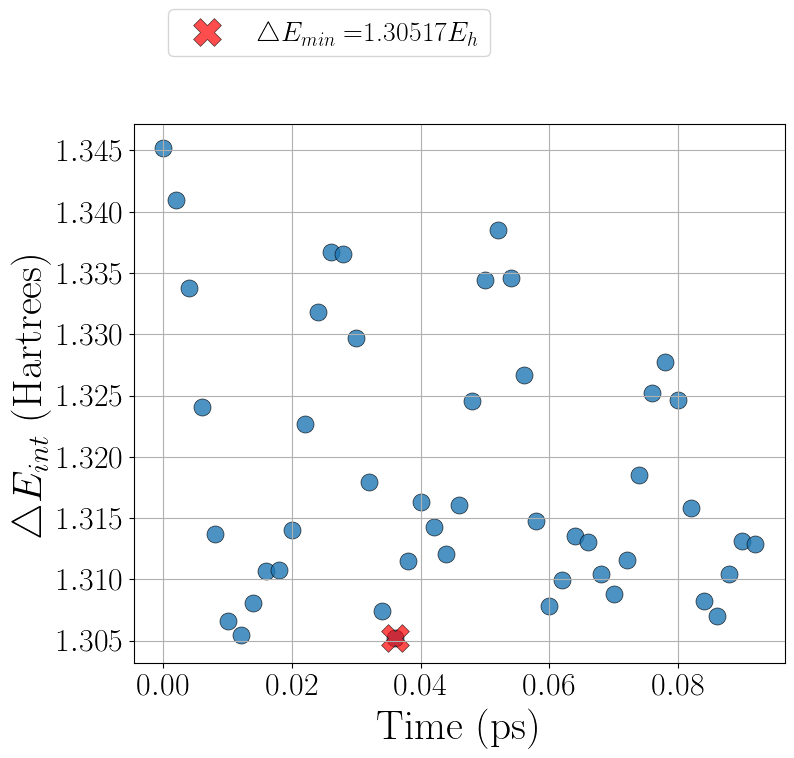

baot-dmf2-bg.pdf


In [8]:
import numpy as np
import sys
sys.path.append('../code/')
from herramientas import *
import matplotlib.pyplot as plt
from collections import defaultdict
import codecs
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) 
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"


herr = herramientas()

# path_grl0 = "/home/antonio/SIMS/aot-dmf-2"

path_grl0 = "/data/mllab/SIMS/aot_solventes/dnuevo-2das/aot-dmf-2"

plabel = "dmf2"

path_salida = os.path.join(path_grl0, "salida.out")
path = path_salida
txt_2find = "Total DFT energy"

N = 34
au2aFactor = 0.5291771057875306

dic2 = defaultdict(dict)

dfxyz_ = pd.DataFrame({})
idy = 0 # frames
f = open(path, 'r')
# f = open(path, 'r', encoding='utf-8')
# fdata = codecs.open(path, 'r', encoding='utf-8', errors='ignore') 

for line in f:
    
    if txt_2find in line:
        energy = line.split()[4]
        dic2["energy"][idy] = float(energy)
    
    if "DFT ENERGY GRADIENTS" in line:
        line = next(f)
        line = next(f)
        line = next(f)
        
        dic = defaultdict(dict)
        
        idx=0
        for i in range(N):
            line = next(f)
            sp = line.split()
            
            ida = sp[0]
            atom = sp[1]
            x = sp[2]
            y = sp[3]
            z = sp[4]
            fx = sp[5]
            fy = sp[6]
            fz = sp[7]
            
            dic["ida"][idx] = ida
            dic["atom"][idx] = atom
            dic["x"][idx] = float(x)*au2aFactor
            dic["y"][idx] = float(y)*au2aFactor
            dic["z"][idx] = float(z)*au2aFactor
            dic["fx"][idx] = float(fx)
            dic["fy"][idx] = float(fy)
            dic["fz"][idx] = float(fz)        
            dic["frame"][idx] = idy  
            
            idx+=1
            
        dfxyz = pd.DataFrame(dic)
        dfxyz_ = pd.concat([dfxyz_, dfxyz], ignore_index=True)        
 
        cm_vMol = herr.get_CM_from_frame(df=dfxyz.loc[24:]).values 
        vS = dfxyz[["x", "y", "z"]].loc[0].values 
        d = np.linalg.norm(cm_vMol - vS)        
        
        dic2["distance"][idy] = float(d)
        
        
        idy+=1
        
        
        
f.close() 

fig = plt.figure()
ax = plt.gca()

df = pd.DataFrame(dic2)

df2 = df.copy()

refP = df2["energy"].iloc[-1]
print(f"refP e[-1]{refP}")


# -248.589025296097
refP = (-1321.244893630513) + (-248.589025296097) # forma E alone no def
print(f"refP A + B: {refP}")

# df2 = df2.loc[5:]
# df2 = df2[(df2["energy"] - refP)  < -0.02 ]

d = df2["distance"].values
e = df2["energy"].values - refP

df_mpkl = dfxyz_.copy()  # <=======


tmp_df = df_mpkl[df_mpkl["frame"] == df.loc[df[['energy']].idxmin()].index[0]].copy()
tmp_df.loc[:,'ida'] = tmp_df['ida'].astype(int)
tmp_df = tmp_df.set_index('ida')

for idx in tmp_df.index:
    
    symbol = tmp_df["atom"].loc[idx]
    x, y, z = tmp_df[["x", "y", "z"]].loc[idx].values
    print(f"{symbol:<10}{x:.7f}{y:15.7f}{z:15.7f}")
    

df.loc[df[['energy']].idxmin()]





markers = ["v", "P", "X", "^"]


df = df.set_index(2*df.index.values/1e3)
df2 = df2.set_index(2*df2.index.values/1e3)

frames = df.index.values

# from
# c = max + (min-max)/2
# so
# c = min +max/2

# c = (df2["energy"].min() + df2["energy"].max())/2.0
# df3 = df2[df2["energy"] < c].copy()

df3 = df2.copy()

frames = df3.index.values
e = df3["energy"].values - refP

# plt.scatter(frames, e, s=150, edgecolors='black', label=f"AOT-MeOH", alpha=0.8, linewidth=0.5)
plt.scatter(frames, e, s=150, edgecolors='black', alpha=0.8, linewidth=0.5)


#################################################


xmin = df.loc[df[['energy']].idxmin()].iloc[0].name
ymin = df.loc[df[['energy']].idxmin()]["energy"].iloc[0]
print(f"ymin {ymin}")
ymin =  ymin - refP
print(f"ymin - refP: {ymin}")

xmin_label = np.round(xmin, decimals=4)
ymin_label = np.round(ymin, decimals=5)

txt1 = r"$t_{min}=$"
txt2 = r"$\triangle E_{min}=$"
# plt.scatter(xmin, ymin, label=f"{txt1}" + f"{xmin_label:.2f} fs, " + f"{txt2}" + f"{ymin_label:.4f}" + "$ E_{h}$",
#             alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)

plt.scatter(xmin, ymin, label=f"{txt2}" + f"{ymin_label:.5f}" + "$ E_{h}$",
            alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)




# plt.scatter(frames, e, s=50, label="B3LYP/6-31G**")


plt.xlabel("Time (ps)", fontsize=30)
plt.ylabel(r"$\triangle E_{int}$  (Hartrees)", fontsize=30)
plt.grid()

fw = 6
fh = 5
ff = fw/fh

fh = 7
fw = fh*ff

fig.set_size_inches(fw, fh)

plt.legend(fontsize=20)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)


ax.legend(loc='lower center', fontsize=20,  bbox_to_anchor=(0.3,1.1))

plt.show()

name_plot = f"baot-{plabel}-bg-time.pdf"
name_plot = f"baot-{plabel}-bg.pdf"
fig.savefig(name_plot, format="pdf", bbox_inches='tight')
print(name_plot)



# 2da dins aot-dmf-2-002

refP e[-1]-1569.861343933319
refP A + B: -1569.8339189266098
S         0.0660895      1.0955162     -0.4799250
Na        4.0968214    -12.2650098     -0.2130885
O         -2.7734945     -2.5453281     -0.8228598
O         -0.6863469     -1.6921390      1.6700216
O         -4.3821151     -1.3902356      0.2667889
O         0.9031513     -1.9865012      0.0907920
O         -0.8736190      2.0731355     -1.1627963
O         0.2003046      1.5332123      0.9649666
O         1.3247097      0.8426759     -1.1850419
C         -3.1501389     -1.5382940     -0.2639244
C         -2.3359745     -0.2702777     -0.0897183
C         -0.8681579     -0.5019996     -0.4305110
C         -0.2249257     -1.4513270      0.5749102
C         1.6027827     -2.8666582      0.9858427
C         -5.2450093     -2.5336333      0.1417560
H         -2.4378491      0.0721459      0.9437043
H         -2.7501593      0.5017731     -0.7463498
H         -0.7545976     -0.9132126     -1.4359993
H         2.4876801     -3.

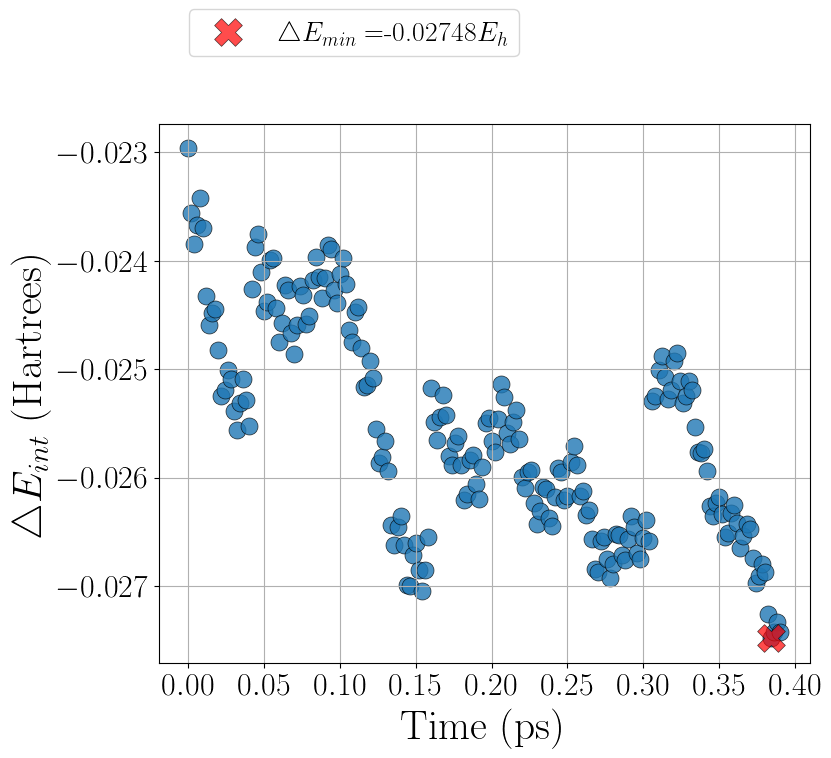

baot-dmf2-02-bg.pdf


In [14]:
import numpy as np
import sys
sys.path.append('../code/')
from herramientas import *
import matplotlib.pyplot as plt
from collections import defaultdict
import codecs
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) 
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"


herr = herramientas()

# path_grl0 = "/home/antonio/SIMS/aot-dmf-2"

path_grl0 = "/data/mllab/SIMS/aot_solventes/dnuevo-2das/aot-dmf-2-002"

plabel = "dmf2-02"

path_salida = os.path.join(path_grl0, "salida.out")
path = path_salida
txt_2find = "Total DFT energy"

N = 36
au2aFactor = 0.5291771057875306

dic2 = defaultdict(dict)

dfxyz_ = pd.DataFrame({})
idy = 0 # frames
f = open(path, 'r')
# f = open(path, 'r', encoding='utf-8')
# fdata = codecs.open(path, 'r', encoding='utf-8', errors='ignore') 

for line in f:
    
    if txt_2find in line:
        energy = line.split()[4]
        dic2["energy"][idy] = float(energy)
    
    if "DFT ENERGY GRADIENTS" in line:
        line = next(f)
        line = next(f)
        line = next(f)
        
        dic = defaultdict(dict)
        
        idx=0
        for i in range(N):
            line = next(f)
            sp = line.split()
            
            ida = sp[0]
            atom = sp[1]
            x = sp[2]
            y = sp[3]
            z = sp[4]
            fx = sp[5]
            fy = sp[6]
            fz = sp[7]
            
            dic["ida"][idx] = ida
            dic["atom"][idx] = atom
            dic["x"][idx] = float(x)*au2aFactor
            dic["y"][idx] = float(y)*au2aFactor
            dic["z"][idx] = float(z)*au2aFactor
            dic["fx"][idx] = float(fx)
            dic["fy"][idx] = float(fy)
            dic["fz"][idx] = float(fz)        
            dic["frame"][idx] = idy  
            
            idx+=1
            
        dfxyz = pd.DataFrame(dic)
        dfxyz_ = pd.concat([dfxyz_, dfxyz], ignore_index=True)        
 
        cm_vMol = herr.get_CM_from_frame(df=dfxyz.loc[24:]).values 
        vS = dfxyz[["x", "y", "z"]].loc[0].values 
        d = np.linalg.norm(cm_vMol - vS)        
        
        dic2["distance"][idy] = float(d)
        
        
        idy+=1
        
        
        
f.close() 

fig = plt.figure()
ax = plt.gca()

df = pd.DataFrame(dic2)

df2 = df.copy()

refP = df2["energy"].iloc[-1]
print(f"refP e[-1]{refP}")


# -248.589025296097
refP = (-1321.244893630513) + (-248.589025296097) # forma E alone no def
print(f"refP A + B: {refP}")

# df2 = df2.loc[5:]
# df2 = df2[(df2["energy"] - refP)  < -0.02 ]

d = df2["distance"].values
e = df2["energy"].values - refP

df_mpkl = dfxyz_.copy()  # <=======


tmp_df = df_mpkl[df_mpkl["frame"] == df.loc[df[['energy']].idxmin()].index[0]].copy()
tmp_df.loc[:,'ida'] = tmp_df['ida'].astype(int)
tmp_df = tmp_df.set_index('ida')

for idx in tmp_df.index:
    
    symbol = tmp_df["atom"].loc[idx]
    x, y, z = tmp_df[["x", "y", "z"]].loc[idx].values
    print(f"{symbol:<10}{x:.7f}{y:15.7f}{z:15.7f}")
    

df.loc[df[['energy']].idxmin()]





markers = ["v", "P", "X", "^"]


df = df.set_index(2*df.index.values/1e3)
df2 = df2.set_index(2*df2.index.values/1e3)

frames = df.index.values

# from
# c = max + (min-max)/2
# so
# c = min +max/2

# c = (df2["energy"].min() + df2["energy"].max())/2.0
# df3 = df2[df2["energy"] < c].copy()

df3 = df2.copy()

frames = df3.index.values
e = df3["energy"].values - refP

# plt.scatter(frames, e, s=150, edgecolors='black', label=f"AOT-MeOH", alpha=0.8, linewidth=0.5)
plt.scatter(frames, e, s=150, edgecolors='black', alpha=0.8, linewidth=0.5)


#################################################


xmin = df.loc[df[['energy']].idxmin()].iloc[0].name
ymin = df.loc[df[['energy']].idxmin()]["energy"].iloc[0]
print(f"ymin {ymin}")
ymin =  ymin - refP
print(f"ymin - refP: {ymin}")

xmin_label = np.round(xmin, decimals=4)
ymin_label = np.round(ymin, decimals=5)

txt1 = r"$t_{min}=$"
txt2 = r"$\triangle E_{min}=$"
# plt.scatter(xmin, ymin, label=f"{txt1}" + f"{xmin_label:.2f} fs, " + f"{txt2}" + f"{ymin_label:.4f}" + "$ E_{h}$",
#             alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)

plt.scatter(xmin, ymin, label=f"{txt2}" + f"{ymin_label:.5f}" + "$ E_{h}$",
            alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)




# plt.scatter(frames, e, s=50, label="B3LYP/6-31G**")


plt.xlabel("Time (ps)", fontsize=30)
plt.ylabel(r"$\triangle E_{int}$  (Hartrees)", fontsize=30)
plt.grid()

fw = 6
fh = 5
ff = fw/fh

fh = 7
fw = fh*ff

fig.set_size_inches(fw, fh)

plt.legend(fontsize=20)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)


ax.legend(loc='lower center', fontsize=20,  bbox_to_anchor=(0.3,1.1))

plt.show()

name_plot = f"baot-{plabel}-bg-time.pdf"
name_plot = f"baot-{plabel}-bg.pdf"
fig.savefig(name_plot, format="pdf", bbox_inches='tight')
print(name_plot)



# dms-1

refP e[-1]-1874.519929762138
refP A + B: -1874.494339194568
S         -0.7831361     -0.2057112     -0.2723765
Na        7.7413499    -11.2562183     -0.4724493
O         -2.1264622     -4.5880290     -0.9261377
O         -0.5475491     -3.2075779      1.7006980
O         -4.0693899     -4.1492290      0.1422910
O         1.0832615     -2.8195472      0.1851543
O         -1.9914898      0.4156337     -0.9496946
O         -0.8519804      0.1598591      1.1969674
O         0.5009921      0.0489658     -0.9292276
C         -2.8522514     -3.8170735     -0.3367117
C         -2.5490578     -2.3563082     -0.0625953
C         -1.0867329     -2.0305198     -0.3452018
C         -0.1738162     -2.7507409      0.6415272
C         2.0271330     -3.4484408      1.0677513
C         -4.4638708     -5.5140805     -0.0789056
H         -2.7935175     -2.1376458      0.9805366
H         -3.1940453     -1.7419579     -0.6991938
H         -0.8074481     -2.3109487     -1.3631332
H         2.9838022     -3

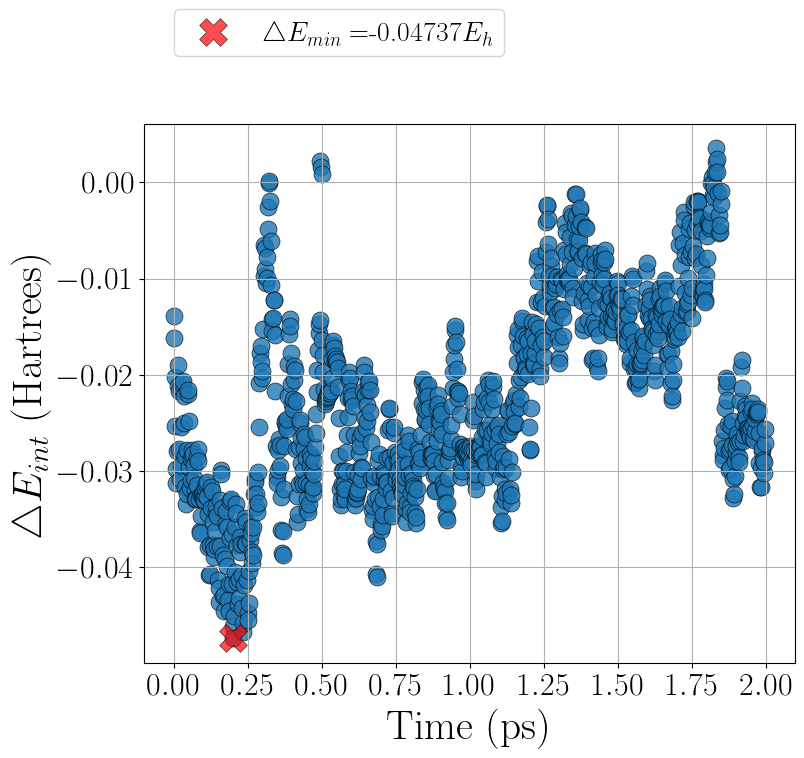

aot-dms1-bg.pdf


In [15]:
import numpy as np
import sys
sys.path.append('../code/')
from herramientas import *
import matplotlib.pyplot as plt
from collections import defaultdict
import codecs
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) 
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"


herr = herramientas()

# path_grl0 = "/home/antonio/SIMS/dms-1"
path_grl0 = "/data/mllab/SIMS/aot_solventes/dms-1"


plabel = "dms1"

path_salida = os.path.join(path_grl0, "salida.out")
path = path_salida
txt_2find = "Total DFT energy"

N = 34
au2aFactor = 0.5291771057875306

dic2 = defaultdict(dict)

dfxyz_ = pd.DataFrame({})
idy = 0 # frames
f = open(path, 'r')
# f = open(path, 'r', encoding='utf-8')
# fdata = codecs.open(path, 'r', encoding='utf-8', errors='ignore') 

for line in f:
    
    if txt_2find in line:
        energy = line.split()[4]
        dic2["energy"][idy] = float(energy)
    
    if "DFT ENERGY GRADIENTS" in line:
        line = next(f)
        line = next(f)
        line = next(f)
        
        dic = defaultdict(dict)
        
        idx=0
        for i in range(N):
            line = next(f)
            sp = line.split()
            
            ida = sp[0]
            atom = sp[1]
            x = sp[2]
            y = sp[3]
            z = sp[4]
            fx = sp[5]
            fy = sp[6]
            fz = sp[7]
            
            dic["ida"][idx] = ida
            dic["atom"][idx] = atom
            dic["x"][idx] = float(x)*au2aFactor
            dic["y"][idx] = float(y)*au2aFactor
            dic["z"][idx] = float(z)*au2aFactor
            dic["fx"][idx] = float(fx)
            dic["fy"][idx] = float(fy)
            dic["fz"][idx] = float(fz)        
            dic["frame"][idx] = idy  
            
            idx+=1
            
        dfxyz = pd.DataFrame(dic)
        dfxyz_ = pd.concat([dfxyz_, dfxyz], ignore_index=True)        
 
        cm_vMol = herr.get_CM_from_frame(df=dfxyz.loc[24:]).values 
        vS = dfxyz[["x", "y", "z"]].loc[0].values 
        d = np.linalg.norm(cm_vMol - vS)        
        
        dic2["distance"][idy] = float(d)
        
        
        idy+=1
        
        
        
f.close() 

fig = plt.figure()
ax = plt.gca()

df = pd.DataFrame(dic2)

df2 = df.copy()

refP = df2["energy"].iloc[-1]
print(f"refP e[-1]{refP}")

refP = (-1321.244893630513) + (-553.249445564055) # forma E alone no def
print(f"refP A + B: {refP}")


# df2 = df2.loc[5:]
# df2 = df2[(df2["energy"] - refP)  < -0.02 ]

d = df2["distance"].values
e = df2["energy"].values - refP

df_mpkl = dfxyz_.copy()  # <=======


tmp_df = df_mpkl[df_mpkl["frame"] == df.loc[df[['energy']].idxmin()].index[0]].copy()
tmp_df.loc[:,'ida'] = tmp_df['ida'].astype(int)
tmp_df = tmp_df.set_index('ida')

for idx in tmp_df.index:
    
    symbol = tmp_df["atom"].loc[idx]
    x, y, z = tmp_df[["x", "y", "z"]].loc[idx].values
    print(f"{symbol:<10}{x:.7f}{y:15.7f}{z:15.7f}")
    

df.loc[df[['energy']].idxmin()]





markers = ["v", "P", "X", "^"]


df = df.set_index(2*df.index.values/1e3)
df2 = df2.set_index(2*df2.index.values/1e3)

frames = df.index.values

# from
# c = max + (min-max)/2
# so
# c = min +max/2

# c = (df2["energy"].min() + df2["energy"].max())/2.0
# df3 = df2[df2["energy"] < c].copy()

df3 = df2.copy()

frames = df3.index.values
e = df3["energy"].values - refP

# plt.scatter(frames, e, s=150, edgecolors='black', label=f"AOT-MeOH", alpha=0.8, linewidth=0.5)
plt.scatter(frames, e, s=150, edgecolors='black', alpha=0.8, linewidth=0.5)


#################################################


xmin = df.loc[df[['energy']].idxmin()].iloc[0].name
ymin = df.loc[df[['energy']].idxmin()]["energy"].iloc[0]
print(f"ymin {ymin}")
ymin =  ymin - refP
print(f"ymin - refP: {ymin}")

xmin_label = np.round(xmin, decimals=4)
ymin_label = np.round(ymin, decimals=5)

txt1 = r"$t_{min}=$"
txt2 = r"$\triangle E_{min}=$"
# plt.scatter(xmin, ymin, label=f"{txt1}" + f"{xmin_label:.2f} fs, " + f"{txt2}" + f"{ymin_label:.4f}" + "$ E_{h}$",
#             alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)

plt.scatter(xmin, ymin, label=f"{txt2}" + f"{ymin_label:.5f}" + "$ E_{h}$",
            alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)




# plt.scatter(frames, e, s=50, label="B3LYP/6-31G**")


plt.xlabel("Time (ps)", fontsize=30)
plt.ylabel(r"$\triangle E_{int}$  (Hartrees)", fontsize=30)
plt.grid()

fw = 6
fh = 5
ff = fw/fh

fh = 7
fw = fh*ff

fig.set_size_inches(fw, fh)

plt.legend(fontsize=20)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)


ax.legend(loc='lower center', fontsize=20,  bbox_to_anchor=(0.3,1.1))

plt.show()

name_plot = f"aot-{plabel}-bg-time.pdf"
name_plot = f"aot-{plabel}-bg.pdf"
fig.savefig(name_plot, format="pdf", bbox_inches='tight')
print(name_plot)



refP e[-1]-1874.546875041166
refP A + B: -1874.494339194568
S         -0.5106808      0.8283876     -0.2356076
Na        6.1786888    -11.4196806     -0.4757101
O         -2.5178300     -3.2835455     -0.9427047
O         -0.7668168     -2.1897327      1.7099162
O         -4.3779378     -2.5545824      0.1144901
O         0.9187753     -2.0494421      0.2112237
O         -1.6003623      1.6371216     -0.9164088
O         -0.5351632      1.1878984      1.2366366
O         0.8035872      0.8841221     -0.8797284
C         -3.1193567     -2.4133201     -0.3515726
C         -2.5936245     -1.0204905     -0.0608300
C         -1.0957337     -0.9255964     -0.3286274
C         -0.3162177     -1.7882635      0.6582503
C         1.7441466     -2.8258936      1.0951140
C         -4.9792946     -3.8388216     -0.1231263
H         -2.8105691     -0.7749645      0.9824099
H         -3.1283998     -0.3073154     -0.6965098
H         -0.8543088     -1.2377934     -1.3469944
H         2.7008718     -2

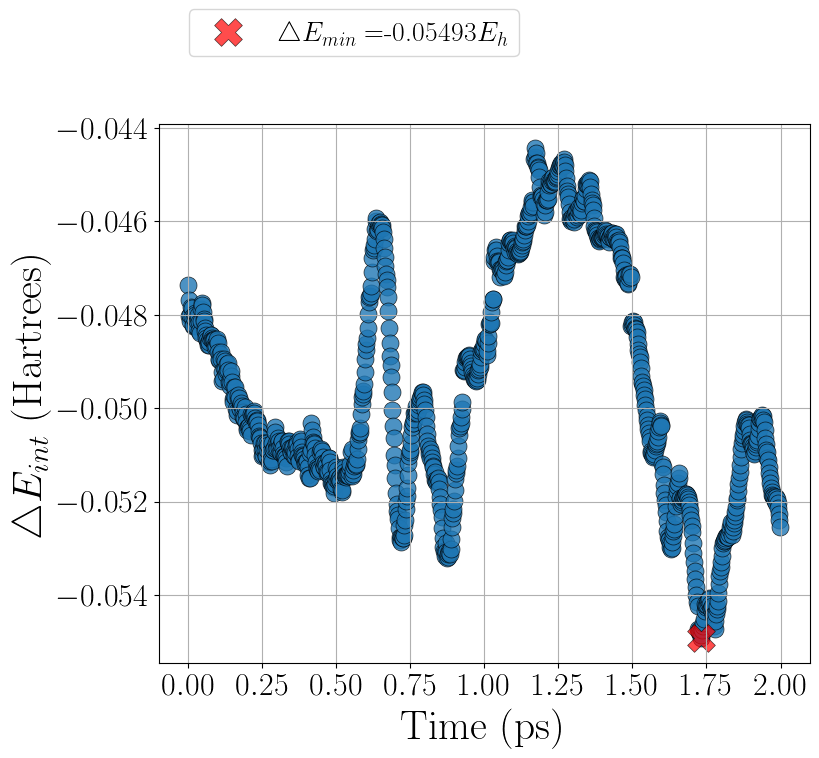

aot-dms2-bg.pdf


In [17]:
import numpy as np
import sys
sys.path.append('../code/')
from herramientas import *
import matplotlib.pyplot as plt
from collections import defaultdict
import codecs
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) 
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"


herr = herramientas()

# path_grl0 = "/home/antonio/SIMS/aot-dms-2"
path_grl0 = "/data/mllab/SIMS/aot_solventes/aot-dms-2"

plabel = "dms2"

path_salida = os.path.join(path_grl0, "salida.out")
path = path_salida
txt_2find = "Total DFT energy"

N = 34
au2aFactor = 0.5291771057875306

dic2 = defaultdict(dict)

dfxyz_ = pd.DataFrame({})
idy = 0 # frames
f = open(path, 'r')
# f = open(path, 'r', encoding='utf-8')
# fdata = codecs.open(path, 'r', encoding='utf-8', errors='ignore') 

for line in f:
    
    if txt_2find in line:
        energy = line.split()[4]
        dic2["energy"][idy] = float(energy)
    
    if "DFT ENERGY GRADIENTS" in line:
        line = next(f)
        line = next(f)
        line = next(f)
        
        dic = defaultdict(dict)
        
        idx=0
        for i in range(N):
            line = next(f)
            sp = line.split()
            
            ida = sp[0]
            atom = sp[1]
            x = sp[2]
            y = sp[3]
            z = sp[4]
            fx = sp[5]
            fy = sp[6]
            fz = sp[7]
            
            dic["ida"][idx] = ida
            dic["atom"][idx] = atom
            dic["x"][idx] = float(x)*au2aFactor
            dic["y"][idx] = float(y)*au2aFactor
            dic["z"][idx] = float(z)*au2aFactor
            dic["fx"][idx] = float(fx)
            dic["fy"][idx] = float(fy)
            dic["fz"][idx] = float(fz)        
            dic["frame"][idx] = idy  
            
            idx+=1
            
        dfxyz = pd.DataFrame(dic)
        dfxyz_ = pd.concat([dfxyz_, dfxyz], ignore_index=True)        
 
        cm_vMol = herr.get_CM_from_frame(df=dfxyz.loc[24:]).values 
        vS = dfxyz[["x", "y", "z"]].loc[0].values 
        d = np.linalg.norm(cm_vMol - vS)        
        
        dic2["distance"][idy] = float(d)
        
        
        idy+=1
        
        
        
f.close() 

fig = plt.figure()
ax = plt.gca()

df = pd.DataFrame(dic2)

df2 = df.copy()

refP = df2["energy"].iloc[-1]
print(f"refP e[-1]{refP}")

refP = (-1321.244893630513) + (-553.249445564055) # forma E alone no def
print(f"refP A + B: {refP}")


# df2 = df2.loc[5:]
# df2 = df2[(df2["energy"] - refP)  < -0.02 ]

d = df2["distance"].values
e = df2["energy"].values - refP

df_mpkl = dfxyz_.copy()  # <=======


tmp_df = df_mpkl[df_mpkl["frame"] == df.loc[df[['energy']].idxmin()].index[0]].copy()
tmp_df.loc[:,'ida'] = tmp_df['ida'].astype(int)
tmp_df = tmp_df.set_index('ida')

for idx in tmp_df.index:
    
    symbol = tmp_df["atom"].loc[idx]
    x, y, z = tmp_df[["x", "y", "z"]].loc[idx].values
    print(f"{symbol:<10}{x:.7f}{y:15.7f}{z:15.7f}")
    

df.loc[df[['energy']].idxmin()]





markers = ["v", "P", "X", "^"]


df = df.set_index(2*df.index.values/1e3)
df2 = df2.set_index(2*df2.index.values/1e3)

frames = df.index.values

# from
# c = max + (min-max)/2
# so
# c = min +max/2

# c = (df2["energy"].min() + df2["energy"].max())/2.0
# df3 = df2[df2["energy"] < c].copy()

df3 = df2.copy()

frames = df3.index.values
e = df3["energy"].values - refP

# plt.scatter(frames, e, s=150, edgecolors='black', label=f"AOT-MeOH", alpha=0.8, linewidth=0.5)
plt.scatter(frames, e, s=150, edgecolors='black', alpha=0.8, linewidth=0.5)


#################################################


xmin = df.loc[df[['energy']].idxmin()].iloc[0].name
ymin = df.loc[df[['energy']].idxmin()]["energy"].iloc[0]
print(f"ymin {ymin}")
ymin =  ymin - refP
print(f"ymin - refP: {ymin}")

xmin_label = np.round(xmin, decimals=4)
ymin_label = np.round(ymin, decimals=5)

txt1 = r"$t_{min}=$"
txt2 = r"$\triangle E_{min}=$"
# plt.scatter(xmin, ymin, label=f"{txt1}" + f"{xmin_label:.2f} fs, " + f"{txt2}" + f"{ymin_label:.4f}" + "$ E_{h}$",
#             alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)

plt.scatter(xmin, ymin, label=f"{txt2}" + f"{ymin_label:.5f}" + "$ E_{h}$",
            alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)




# plt.scatter(frames, e, s=50, label="B3LYP/6-31G**")


plt.xlabel("Time (ps)", fontsize=30)
plt.ylabel(r"$\triangle E_{int}$  (Hartrees)", fontsize=30)
plt.grid()

fw = 6
fh = 5
ff = fw/fh

fh = 7
fw = fh*ff

fig.set_size_inches(fw, fh)

plt.legend(fontsize=20)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)


ax.legend(loc='lower center', fontsize=20,  bbox_to_anchor=(0.3,1.1))

plt.show()

name_plot = f"aot-{plabel}-bg-time.pdf"
name_plot = f"aot-{plabel}-bg.pdf"
fig.savefig(name_plot, format="pdf", bbox_inches='tight')
print(name_plot)



# explorando de nuevo el minimo del output

# viendo el que hay que chekar

In [5]:
lss = [5.899116,  27.904615,   0.343242]
lss = [0.17576340,    14.69408842,    -0.20170873]


au2aFactor = 0.5291771057875306


 H                     3.12167796    14.76648716     0.18163600


IndentationError: unexpected indent (1281992936.py, line 8)

In [2]:
lss[0]*au2aFactor

3.1216771315849146

In [3]:
lss[1]*au2aFactor

14.766483403815315

In [4]:
lss[2]*au2aFactor

0.18163580814472358